<a href="https://colab.research.google.com/github/Sathyadev75/DS_PROJECTS_PRAKASH/blob/main/Attrition_Analysis_of_Hospital_Employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
df_original=pd.read_csv("/content/drive/MyDrive/DATA SCIENCE PROJECTS/Attrition analysis/watson_healthcare.csv")
df=df_original

In [3]:
df.head()


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df3={}
for i in df.columns:
     listed=[]
     s=df[i].unique()
     listed.append(s)
     df3[i]=listed
df3

{'EmployeeID': [array([1313919, 1200302, 1060315, ..., 1812428, 1812429, 1152329])],
 'Age': [array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
         24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
         58, 20, 25, 19, 57, 52, 47, 18, 60])],
 'Attrition': [array(['No', 'Yes'], dtype=object)],
 'BusinessTravel': [array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)],
 'DailyRate': [array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
          153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
          419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
          895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
          721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
          515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
         1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
          193,  397,

In [5]:
from sklearn.preprocessing import LabelEncoder as Le
Le=Le()

df["Attrition"]=Le.fit_transform(df["Attrition"])

<ipython-input-6-fe5d5ed6783a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<Axes: >

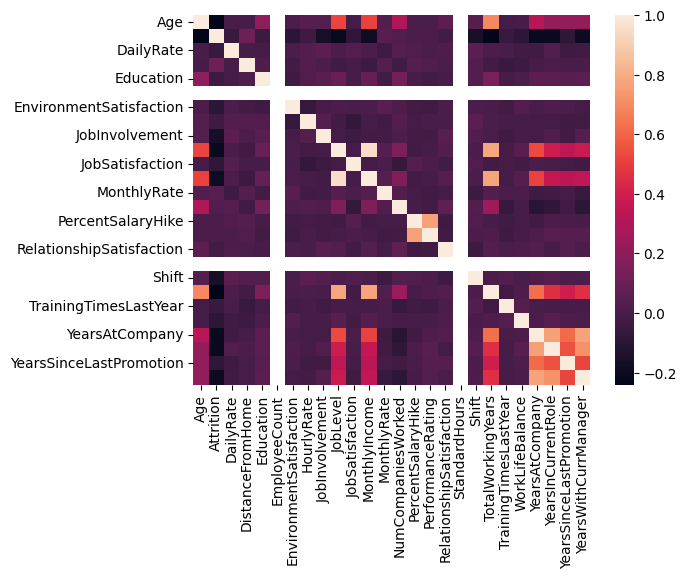

In [6]:
df.drop(columns=["EmployeeID"],inplace=True)

corr_matrix=df.corr()
sns.heatmap(corr_matrix)

In [7]:
corr_matrix=df.corr()

s=corr_matrix.iloc[0:,1:2]
df2=pd.DataFrame(s)
df2=df2[df2["Attrition"]>-0.19]
df2=df2[df2["Attrition"]<-0.0004]
filtered_columns=df2.index.to_list()


filtered_columns.extend(["Age","Department","Attrition","Gender","JobRole","EducationField"])

print(filtered_columns)

['DailyRate', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'Shift', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion', 'Age', 'Department', 'Attrition', 'Gender', 'JobRole', 'EducationField']


<ipython-input-7-061315c7b36d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


In [8]:
df=df[filtered_columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DailyRate                 1676 non-null   int64 
 1   Education                 1676 non-null   int64 
 2   EnvironmentSatisfaction   1676 non-null   int64 
 3   HourlyRate                1676 non-null   int64 
 4   JobInvolvement            1676 non-null   int64 
 5   JobSatisfaction           1676 non-null   int64 
 6   RelationshipSatisfaction  1676 non-null   int64 
 7   Shift                     1676 non-null   int64 
 8   TrainingTimesLastYear     1676 non-null   int64 
 9   WorkLifeBalance           1676 non-null   int64 
 10  YearsSinceLastPromotion   1676 non-null   int64 
 11  Age                       1676 non-null   int64 
 12  Department                1676 non-null   object
 13  Attrition                 1676 non-null   int64 
 14  Gender                  

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1676.0,800.557876,401.594438,102.0,465.0,796.5,1157.0,1499.0
Education,1676.0,2.907518,1.025835,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1676.0,2.714797,1.097534,1.0,2.0,3.0,4.0,4.0
HourlyRate,1676.0,65.470167,20.207572,30.0,48.0,65.5,83.0,100.0
JobInvolvement,1676.0,2.724940,0.714121,1.0,2.0,3.0,3.0,4.0
JobSatisfaction,1676.0,2.738663,1.104005,1.0,2.0,3.0,4.0,4.0
RelationshipSatisfaction,1676.0,2.718377,1.078162,1.0,2.0,3.0,4.0,4.0
Shift,1676.0,0.806086,0.855527,0.0,0.0,1.0,1.0,3.0
TrainingTimesLastYear,1676.0,2.805489,1.288431,0.0,2.0,3.0,3.0,6.0
WorkLifeBalance,1676.0,2.766110,0.702369,1.0,2.0,3.0,3.0,4.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DailyRate                 1676 non-null   int64 
 1   Education                 1676 non-null   int64 
 2   EnvironmentSatisfaction   1676 non-null   int64 
 3   HourlyRate                1676 non-null   int64 
 4   JobInvolvement            1676 non-null   int64 
 5   JobSatisfaction           1676 non-null   int64 
 6   RelationshipSatisfaction  1676 non-null   int64 
 7   Shift                     1676 non-null   int64 
 8   TrainingTimesLastYear     1676 non-null   int64 
 9   WorkLifeBalance           1676 non-null   int64 
 10  YearsSinceLastPromotion   1676 non-null   int64 
 11  Age                       1676 non-null   int64 
 12  Department                1676 non-null   object
 13  Attrition                 1676 non-null   int64 
 14  Gender                  

In [12]:
df["Department"]

0       Cardiology
1        Maternity
2        Maternity
3        Maternity
4        Maternity
           ...    
1671     Neurology
1672    Cardiology
1673     Maternity
1674     Neurology
1675    Cardiology
Name: Department, Length: 1676, dtype: object

In [13]:
df.head()

,DailyRate,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,Shift,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,Age,Department,Attrition,Gender,JobRole,EducationField
0,1102,2,2,94,3,4,1,0,0,1,0,41,Cardiology,0,Female,Nurse,Life Sciences
1,279,1,3,61,2,2,4,1,3,3,1,49,Maternity,0,Male,Other,Life Sciences
2,1373,2,4,92,2,3,2,0,3,3,0,37,Maternity,1,Male,Nurse,Other
3,1392,4,4,56,3,3,3,0,3,3,3,33,Maternity,0,Female,Other,Life Sciences
4,591,1,1,40,3,2,4,1,3,3,2,27,Maternity,0,Male,Nurse,Medical


<Axes: >

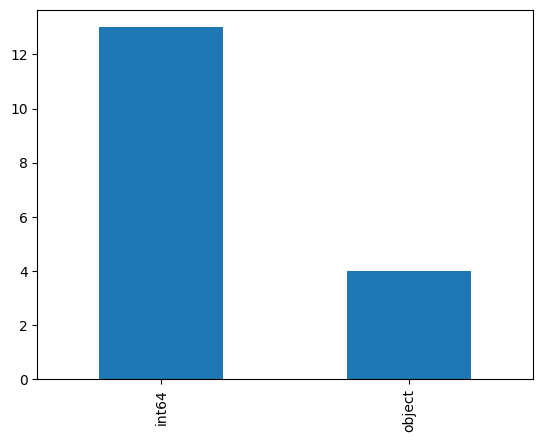

In [14]:
df.dtypes.value_counts().plot(kind="bar")




EmployeeID
Unique identifier for each employee


Age
Employee's age in years

Attrition
Binary variable that indicates whether the employee has left the company (1) or not (0)


BusinessTravel
How often the employee travels for work


DailyRate
Employee's daily pay rate


Department
Employee's department within the company


DistanceFromHome
Distance in miles from the employee's home to their work location


Education
Highest level of education the employee has completed


EducationField
Field of study the employee majored in


EmployeeCount
Total number of employees in the company


EnvironmentSatisfaction
Measure of how satisfied the employee is with their work environment


Gender
Employee's gender


HourlyRate
Employee's hourly pay rate


JobInvolvement
Measure of how involved the employee is in their job


JobLevel
Employee's job level within the company


JobRole
Employee's job title


JobSatisfaction
Measure of how satisfied the employee is with their job


MaritalStatus
Employee's marital status


MonthlyIncome
Employee's monthly income


MonthlyRate
Employee's monthly pay rate


NumCompaniesWorked
Number of companies the employee has worked for in the past


Over18
Binary variable that indicates whether the employee is over 18 years old (1) or not (0)


OverTime
Binary variable that indicates whether the employee works overtime (1) or not (0)


PercentSalaryHike
Employee's percentage salary increase in the past year


PerformanceRating
Measure of the employee's performance rating


RelationshipSatisfaction
Measure of how satisfied the employee is with their relationships at work


StandardHours
Number of standard hours the employee works per week


Shift
Employee's shift


TotalWorkingYears
Total number of years the employee has worked


TrainingTimesLastYear
Number of times the employee received training in the past year


WorkLifeBalance
Measure of how satisfied the employee is with their work-life balance


YearsAtCompany
Number of years the employee has been with the company


YearsInCurrentRole

Number of years the employee has been in their current role


YearsSinceLastPromotion

Number of years since the employee was last promoted


YearsWithCurrManager

Number of years the employee has been with their current manager


**bold text**

EmployeeID: This is a unique identifier for each employee.
Age: This is the employee's age in years.
Attrition: This is a binary variable that indicates whether the employee has left the company (1) or not (0).
BusinessTravel: This indicates how often the employee travels for work. The possible values are:
Travel_Rarely
Travel_Frequently
Travel_No
DailyRate: This is the employee's daily pay rate.
Department: This is the employee's department within the company.
DistanceFromHome: This is the distance in miles from the employee's home to their work location.
Education: This is the highest level of education the employee has completed. The possible values are:
High School
College
Graduate School
EducationField: This is the field of study the employee majored in.
EmployeeCount: This is the total number of employees in the company.
EnvironmentSatisfaction: This is a measure of how satisfied the employee is with their work environment. The possible values are:
Low
Medium
High
Gender: This is the employee's gender. The possible values are:
Male
Female
HourlyRate: This is the employee's hourly pay rate.
JobInvolvement: This is a measure of how involved the employee is in their job. The possible values are:
Low
Medium
High
JobLevel: This is the employee's job level within the company. The possible values are:
Junior
Mid-Level
Senior
JobRole: This is the employee's job title.
JobSatisfaction: This is a measure of how satisfied the employee is with their job. The possible values are:
Low
Medium
High
MaritalStatus: This is the employee's marital status. The possible values are:
Single
Married
Divorced
MonthlyIncome: This is the employee's monthly income.
MonthlyRate: This is the employee's monthly pay rate.
NumCompaniesWorked: This is the number of companies the employee has worked for in the past.
Over18: This is a binary variable that indicates whether the employee is over 18 years old (1) or not (0).
OverTime: This is a binary variable that indicates whether the employee works overtime (1) or not (0).
PercentSalaryHike: This is the employee's percentage salary increase in the past year.
PerformanceRating: This is a measure of the employee's performance rating. The possible values are:
Low
Good
Excellent
RelationshipSatisfaction: This is a measure of how satisfied the employee is with their relationships at work. The possible values are:
Low
Medium
High
StandardHours: This is the number of standard hours the employee works per week.
Shift: This is the employee's shift. The possible values are:
Day
Evening
Night
TotalWorkingYears: This is the total number of years the employee has worked.
TrainingTimesLastYear: This is the number of times the employee received training in the past year.
WorkLifeBalance: This is a measure of how satisfied the employee is with their work-life balance. The possible values are:
Low
Medium
High
YearsAtCompany: This is the number of years the employee has been with the company.
YearsInCurrentRole: This is the number of years the employee has been in their current role.
YearsSinceLastPromotion: This is the number of years since the employee was last promoted.
YearsWithCurrManager: This is the number of years the employee has been with their current manager.

Data cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DailyRate                 1676 non-null   int64 
 1   Education                 1676 non-null   int64 
 2   EnvironmentSatisfaction   1676 non-null   int64 
 3   HourlyRate                1676 non-null   int64 
 4   JobInvolvement            1676 non-null   int64 
 5   JobSatisfaction           1676 non-null   int64 
 6   RelationshipSatisfaction  1676 non-null   int64 
 7   Shift                     1676 non-null   int64 
 8   TrainingTimesLastYear     1676 non-null   int64 
 9   WorkLifeBalance           1676 non-null   int64 
 10  YearsSinceLastPromotion   1676 non-null   int64 
 11  Age                       1676 non-null   int64 
 12  Department                1676 non-null   object
 13  Attrition                 1676 non-null   int64 
 14  Gender                  

In [16]:
df1=df[df.duplicated()]
df.drop_duplicates(inplace=True)
print(df1.head())

      DailyRate  Education  EnvironmentSatisfaction  HourlyRate  \
1475       1229          4                        1          84   
1477       1206          1                        4          41   
1481        444          2                        2          92   
1491        930          3                        3          57   
1494        933          3                        2          98   

      JobInvolvement  JobSatisfaction  RelationshipSatisfaction  Shift  \
1475               3                4                         4      2   
1477               2                3                         2      2   
1481               3                2                         3      1   
1491               2                2                         3      1   
1494               3                2                         4      1   

      TrainingTimesLastYear  WorkLifeBalance  YearsSinceLastPromotion  Age  \
1475                      3                3                        0   36

<ipython-input-16-66ac5912d6cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [17]:
print(df.duplicated().sum())

0


DATA VISUALIZATION

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1675
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DailyRate                 1620 non-null   int64 
 1   Education                 1620 non-null   int64 
 2   EnvironmentSatisfaction   1620 non-null   int64 
 3   HourlyRate                1620 non-null   int64 
 4   JobInvolvement            1620 non-null   int64 
 5   JobSatisfaction           1620 non-null   int64 
 6   RelationshipSatisfaction  1620 non-null   int64 
 7   Shift                     1620 non-null   int64 
 8   TrainingTimesLastYear     1620 non-null   int64 
 9   WorkLifeBalance           1620 non-null   int64 
 10  YearsSinceLastPromotion   1620 non-null   int64 
 11  Age                       1620 non-null   int64 
 12  Department                1620 non-null   object
 13  Attrition                 1620 non-null   int64 
 14  Gender                  

CATEGORICAL INPUT VS CATEGORICAL OUTPUT

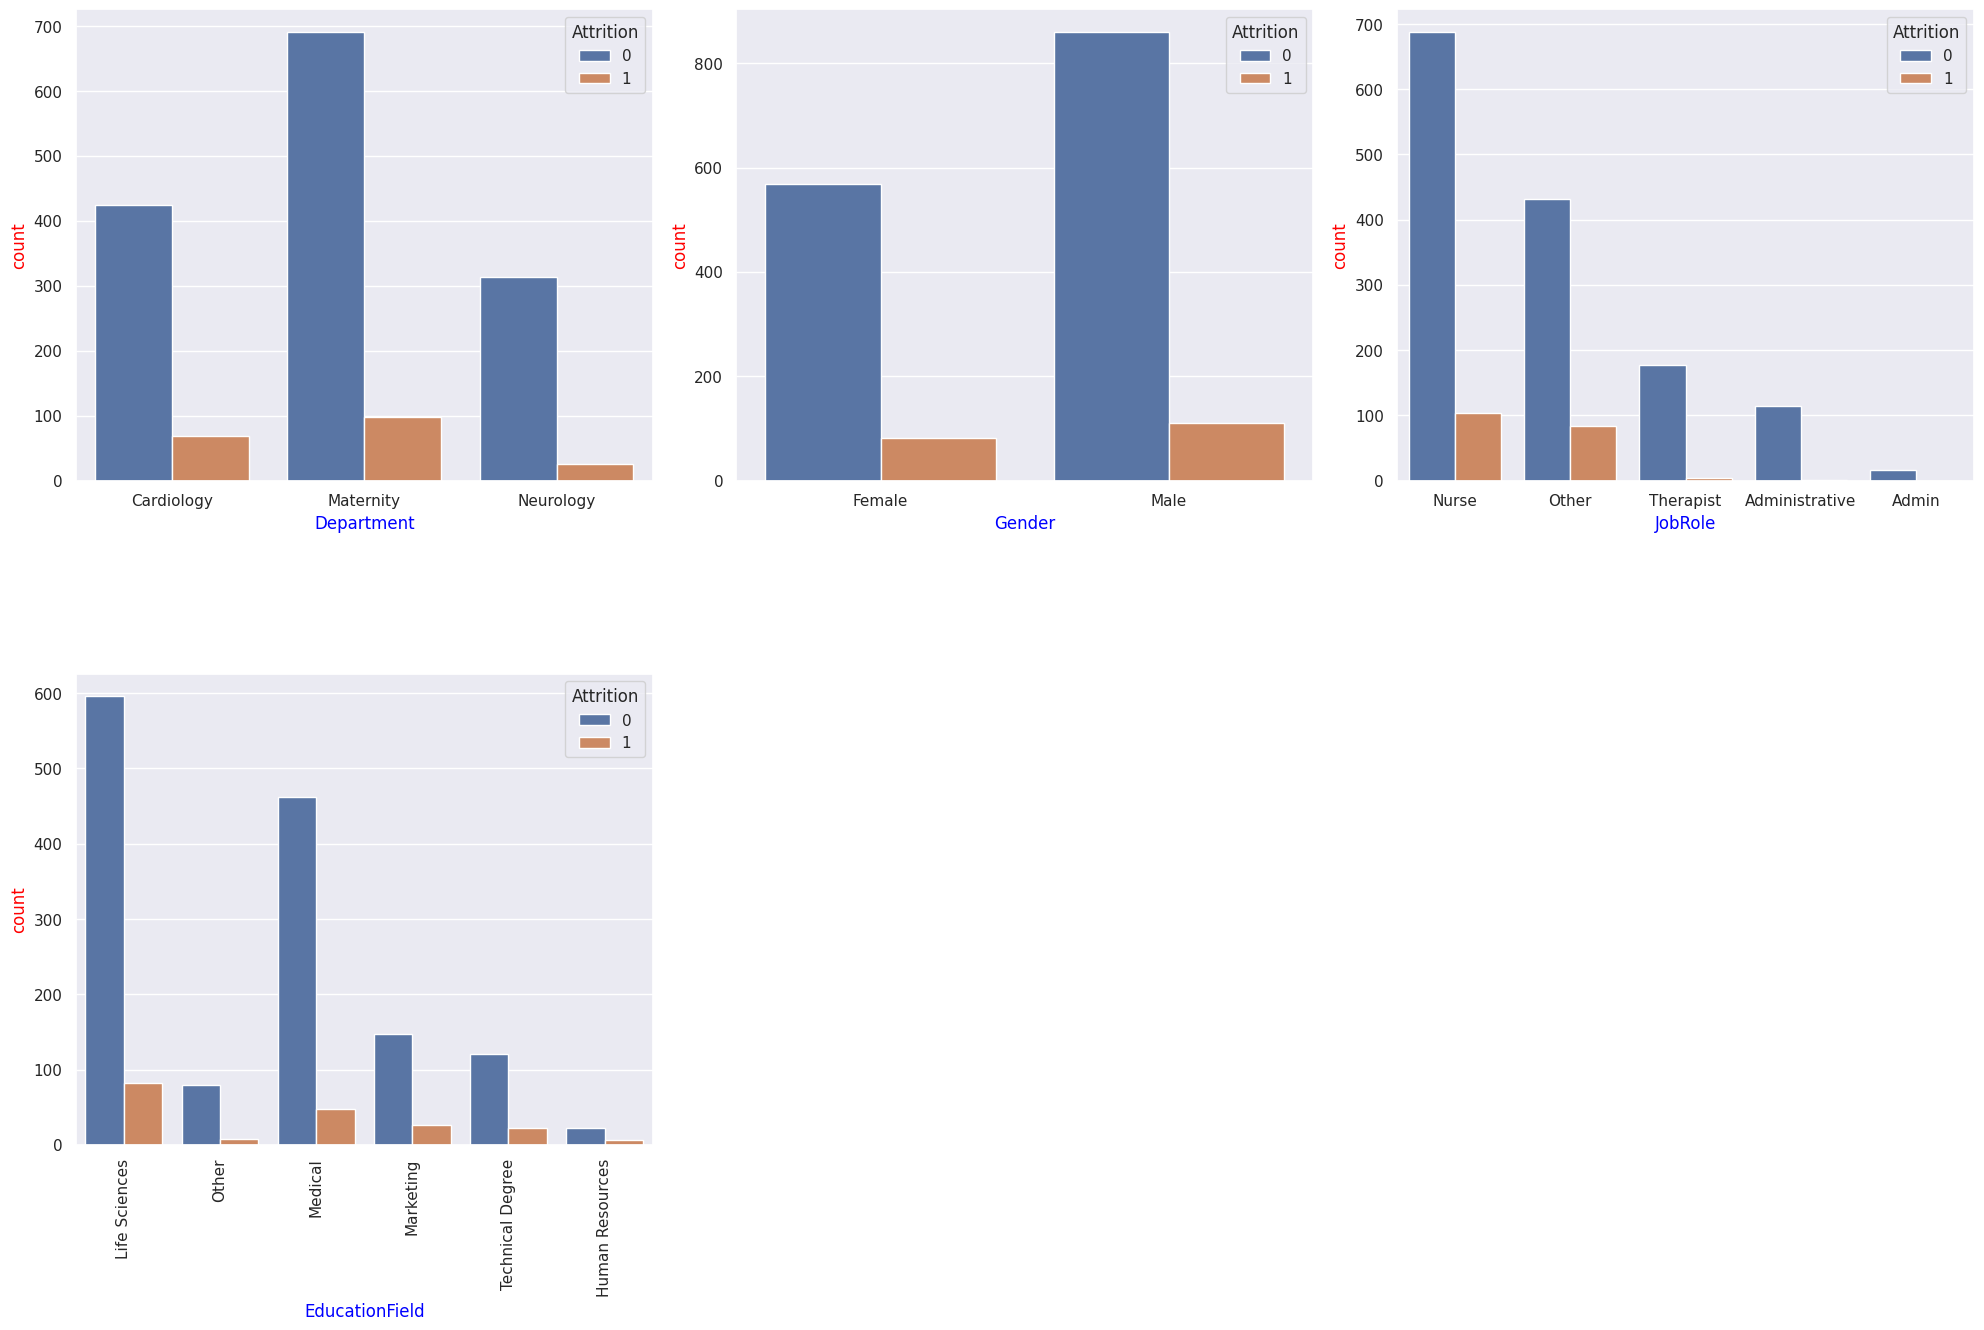

In [19]:
#job,marital,education_qual,call_type,prev_outcome mon
list_cat_vars=[i for i in df.columns if df[i].dtype==object]

import matplotlib.pyplot as plt

#for categorical columns

sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))


for i,cat_column in enumerate(list_cat_vars,1):

      plt.subplot(4,3,i)
      sns.set(style="darkgrid")

      sns.countplot(x=cat_column,hue="Attrition",data=df)
      plt.xlabel(cat_column, color="blue")
      plt.ylabel("count", color="red")


      if cat_column=="EducationField":
          plt.xticks(rotation=90)


plt.tight_layout()
plt.show()



In [20]:
continous_columns=[i for i in df.columns if df[i].dtype=="int64"]
print(continous_columns)
continous_columns.remove("Attrition")

['DailyRate', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'Shift', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion', 'Age', 'Attrition']


CONTINOUS VS TARGET VARIABLE

<ipython-input-21-75881985ab79>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["z_score"]=stats.zscore(df[j])


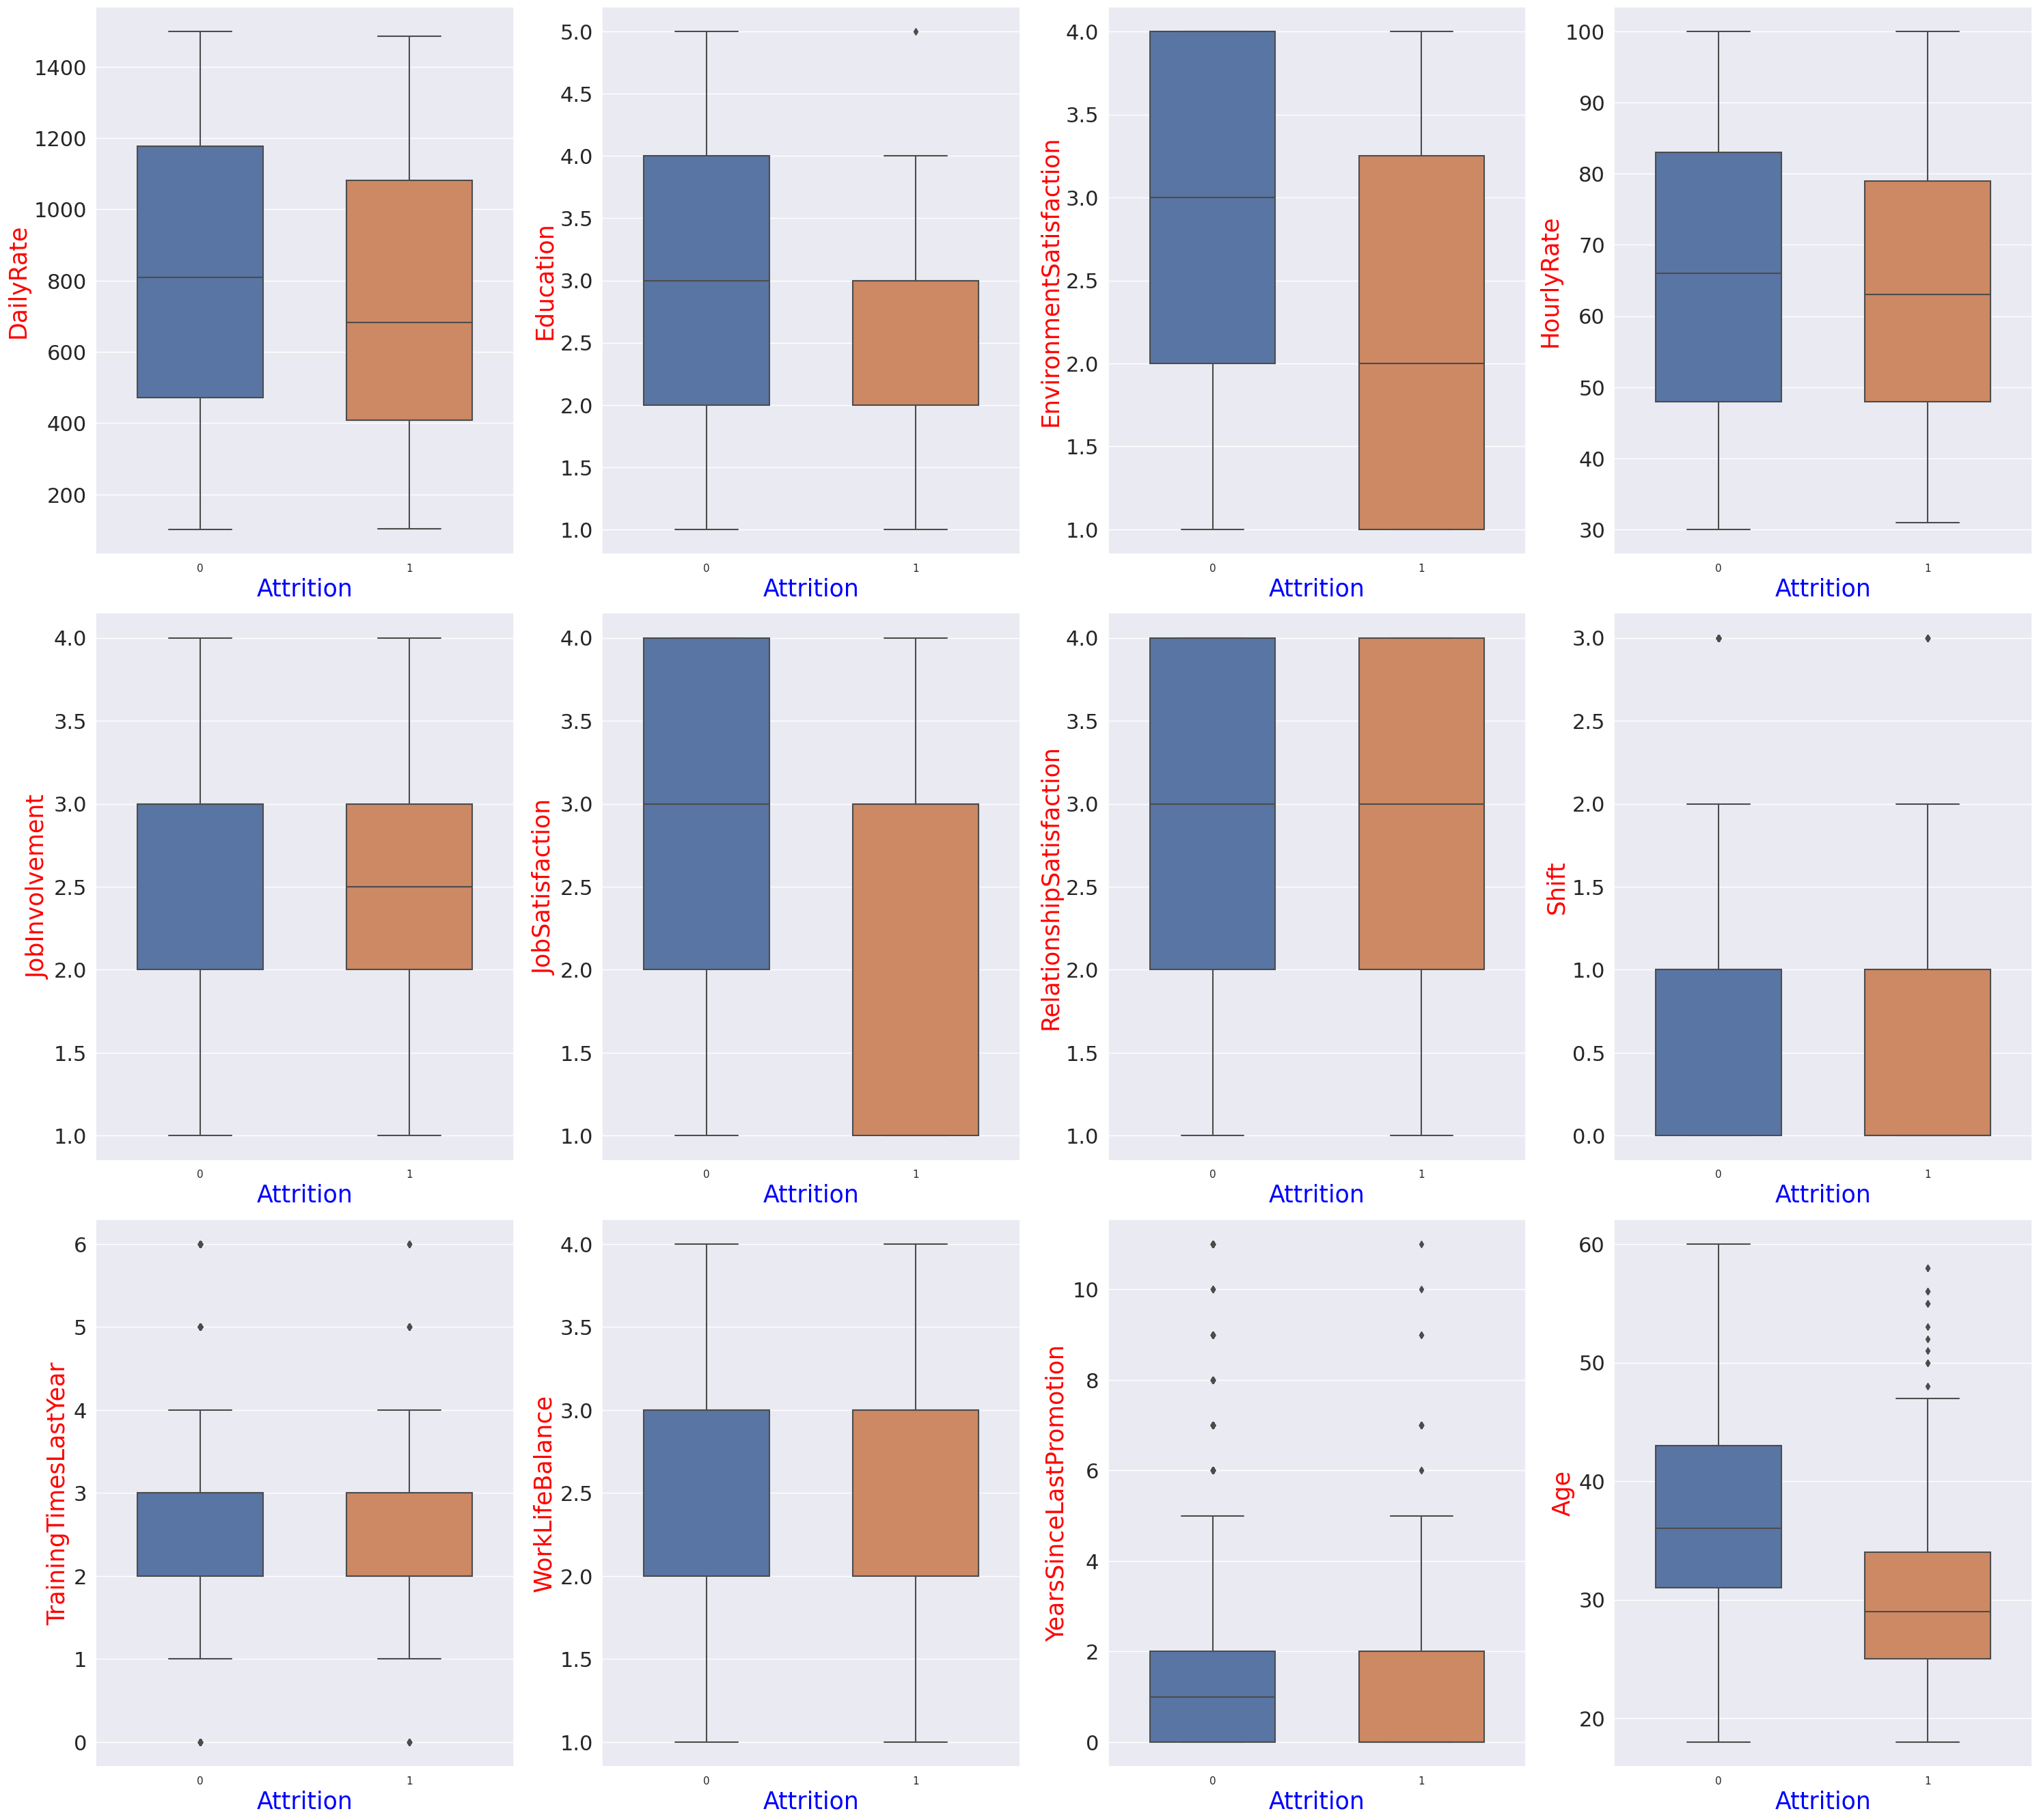

In [21]:
import seaborn as sns
import scipy.stats as stats





plt.figure(figsize=(30,35))
for i ,j in enumerate(continous_columns,start=1):

  df["z_score"]=stats.zscore(df[j])
  df=df[df["z_score"]>-3]
  df=df[df["z_score"]<3]


  ax=plt.subplot(4,4,i)

  sns.boxplot(x="Attrition",y=j,data=df,width=0.6,ax=ax)
  i=+1
  # Adjust the size of y-axis tick labels
  ax.yaxis.set_tick_params(labelsize=22)
  plt.xlabel("Attrition", color="blue",fontsize=25)
  plt.ylabel(j, color="red",fontsize=25)



plt.tight_layout()
plt.show()

In [22]:

continous_columns=[i for i in df.columns if df[i].dtype == "int64"]
print(continous_columns)

['DailyRate', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'Shift', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion', 'Age', 'Attrition']


Encoding

In [23]:
for i in df.columns:
  print(i,df[i].dtype)

DailyRate int64
Education int64
EnvironmentSatisfaction int64
HourlyRate int64
JobInvolvement int64
JobSatisfaction int64
RelationshipSatisfaction int64
Shift int64
TrainingTimesLastYear int64
WorkLifeBalance int64
YearsSinceLastPromotion int64
Age int64
Department object
Attrition int64
Gender object
JobRole object
EducationField object
z_score float64


In [24]:
columns_to_be_encoded=[i for i in df.columns if df[i].dtype==object]
print(columns_to_be_encoded)

from sklearn.preprocessing import LabelEncoder as LE
LE=LE()

for i in columns_to_be_encoded:
  df[i]=LE.fit_transform(df[i])
print(df.head())

['Department', 'Gender', 'JobRole', 'EducationField']
   DailyRate  Education  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0       1102          2                        2          94               3   
1        279          1                        3          61               2   
2       1373          2                        4          92               2   
3       1392          4                        4          56               3   
4        591          1                        1          40               3   

   JobSatisfaction  RelationshipSatisfaction  Shift  TrainingTimesLastYear  \
0                4                         1      0                      0   
1                2                         4      1                      3   
2                3                         2      0                      3   
3                3                         3      0                      3   
4                2                         4      1                      3 

### **ML Model**

In [25]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split

model=lr()

x=df.drop(["Attrition"],axis=1)
y=df["Attrition"]

x_train,x_test,y_train,y_test=train_test_split(x,y)

model.fit(x_train,y_train)
print("SCORE:",model.score(x_test,y_test))



SCORE: 0.9035532994923858


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)